In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

params = {
    "appid": api_key,
    "units": units
}

In [4]:
# Create lists to hold JSON data
lon =  []
lat = []
humidity = []
temp_max = []
wind = []
clouds = []
date = []
country = []
city_name = []

# Print opening
print("Beginning Data Retrieval")
print("-----------------------------")

# Set up initial values for record and set counts
record_count = 1
set_count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        params["q"] = city
        response = requests.get(url, params=params).json()
        print(f"Processing Record {record_count} of Set {set_count} | {city.title()}")
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
    except:
        print("City not found. Skipping...")
    
    record_count += 1
    if record_count == 51:
        record_count = 1
        set_count += 1
    
# Print closing
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Tasiilaq
Processing Record 2 of Set 1 | Bluff
Processing Record 3 of Set 1 | Gouyave
Processing Record 4 of Set 1 | Lufilufi
Processing Record 5 of Set 1 | Port Elizabeth
Processing Record 6 of Set 1 | Ancud
Processing Record 7 of Set 1 | Saskylakh
Processing Record 8 of Set 1 | Ribeira Grande
Processing Record 9 of Set 1 | Awbari
Processing Record 10 of Set 1 | Vaini
Processing Record 11 of Set 1 | Meiganga
Processing Record 12 of Set 1 | Albany
Processing Record 13 of Set 1 | Arraial Do Cabo
Processing Record 14 of Set 1 | Xichang
Processing Record 15 of Set 1 | Provideniya
Processing Record 16 of Set 1 | Port Alfred
Processing Record 17 of Set 1 | Cidreira
Processing Record 18 of Set 1 | Katsuura
Processing Record 19 of Set 1 | Padang
Processing Record 20 of Set 1 | East London
Processing Record 21 of Set 1 | Victoria
Processing Record 22 of Set 1 | Kutum
Processing Record 23 of Set 1 | Hobart
Proc

Processing Record 36 of Set 4 | Byron Bay
Processing Record 37 of Set 4 | Central Point
Processing Record 38 of Set 4 | Avarua
Processing Record 39 of Set 4 | Chagda
City not found. Skipping...
Processing Record 40 of Set 4 | San Patricio
Processing Record 41 of Set 4 | Petatlan
Processing Record 42 of Set 4 | Mahibadhoo
Processing Record 43 of Set 4 | Sisimiut
Processing Record 44 of Set 4 | Akyab
City not found. Skipping...
Processing Record 45 of Set 4 | Carnarvon
Processing Record 46 of Set 4 | Codrington
Processing Record 47 of Set 4 | Lebu
Processing Record 48 of Set 4 | Makung
City not found. Skipping...
Processing Record 49 of Set 4 | Waddan
Processing Record 50 of Set 4 | Sao Felix Do Xingu
Processing Record 1 of Set 5 | Barquisimeto
Processing Record 2 of Set 5 | Korla
City not found. Skipping...
Processing Record 3 of Set 5 | Tuktoyaktuk
Processing Record 4 of Set 5 | Lhokseumawe
Processing Record 5 of Set 5 | Bredasdorp
Processing Record 6 of Set 5 | Aklavik
Processing Reco

Processing Record 19 of Set 8 | Moctezuma
Processing Record 20 of Set 8 | Amantea
Processing Record 21 of Set 8 | Necocli
Processing Record 22 of Set 8 | Mount Gambier
Processing Record 23 of Set 8 | Chilakalurupet
Processing Record 24 of Set 8 | Kiruna
Processing Record 25 of Set 8 | Tabiauea
City not found. Skipping...
Processing Record 26 of Set 8 | Naryan-Mar
Processing Record 27 of Set 8 | Canon City
Processing Record 28 of Set 8 | Sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 8 | Isangel
Processing Record 30 of Set 8 | Tarakan
Processing Record 31 of Set 8 | Georgetown
Processing Record 32 of Set 8 | Yaring
Processing Record 33 of Set 8 | Tymovskoye
Processing Record 34 of Set 8 | Nantucket
Processing Record 35 of Set 8 | Bengkulu
City not found. Skipping...
Processing Record 36 of Set 8 | Yenagoa
Processing Record 37 of Set 8 | Margate
Processing Record 38 of Set 8 | Belmonte
Processing Record 39 of Set 8 | Alyangula
Processing Record 40 of Set 8 | Navolat

Processing Record 1 of Set 12 | Comodoro Rivadavia
Processing Record 2 of Set 12 | Karamea
City not found. Skipping...
Processing Record 3 of Set 12 | Nogliki
Processing Record 4 of Set 12 | Palembang
Processing Record 5 of Set 12 | Nishihara
Processing Record 6 of Set 12 | Geraldton
Processing Record 7 of Set 12 | Ucluelet
Processing Record 8 of Set 12 | Samarai
Processing Record 9 of Set 12 | Pallasovka
Processing Record 10 of Set 12 | Sabzevar
Processing Record 11 of Set 12 | Malakal
City not found. Skipping...
Processing Record 12 of Set 12 | Vaitape
Processing Record 13 of Set 12 | Ganzhou
Processing Record 14 of Set 12 | Vao
Processing Record 15 of Set 12 | Losevo
Processing Record 16 of Set 12 | Ulety
Processing Record 17 of Set 12 | Faratsiho
Processing Record 18 of Set 12 | Adelaide
Processing Record 19 of Set 12 | Dzhankoy
Processing Record 20 of Set 12 | Griffin
Processing Record 21 of Set 12 | San Rafael
Processing Record 22 of Set 12 | Ordubad
Processing Record 23 of Set 1

In [5]:
# Create a dict to convert to a Pandas DataFrame
weather_dict = {
    "City": city_name,
    "Cloudiness" : clouds,
    "Country" : country,            
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : temp_max,
    "Wind Speed" : wind,
}

# Create and display DataFrame info
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,83,GL,1568602536,47,65.61,-37.64,35.60,4.70
1,Bluff,0,AU,1568602547,23,-23.58,149.07,80.87,6.31
2,Gouyave,20,GD,1568603038,83,12.16,-61.73,82.40,9.17
3,Lufilufi,75,WS,1568603038,79,-13.87,-171.60,84.20,13.87
4,Port Elizabeth,20,US,1568603038,88,39.31,-74.98,73.99,2.13


In [7]:
# Check summary statistics
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,47.486679,1.568603e+09,71.122558,20.137425,16.765968,64.631545,7.771776
std,40.013669,1.818055e+02,21.299029,34.068439,90.862029,15.788423,5.211119
min,0.000000,1.568602e+09,5.000000,-54.810000,-179.170000,20.570000,0.160000
25%,1.000000,1.568603e+09,57.500000,-8.200000,-65.250000,52.900000,3.490000
50%,41.000000,1.568603e+09,76.000000,25.210000,20.970000,66.990000,6.910000
75%,90.000000,1.568603e+09,88.000000,49.220000,100.290000,77.720000,11.160000
max,100.000000,1.568603e+09,100.000000,78.220000,179.320000,97.970000,27.510000


In [8]:
# Save to a csv file
weather_df.to_csv(output_data_file, index=False)

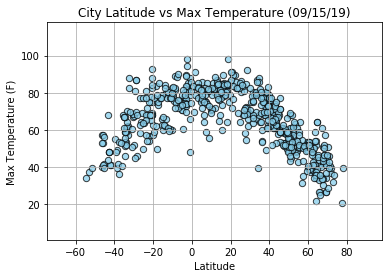

In [14]:
# Build the scatter plot for Latitude vs Temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-20), (weather_df["Lat"].max()+20))
plt.ylim((weather_df["Max Temp"].min()-20), (weather_df["Max Temp"].max()+20))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/LatvTemp.png")

# Show plot
plt.show()

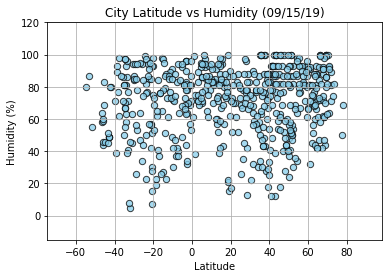

In [15]:
# Build the scatter plot for Latitude vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-20), (weather_df["Lat"].max()+20))
plt.ylim((weather_df["Humidity"].min()-20), (weather_df["Humidity"].max()+20))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/LatvHumidity.png")

# Show plot
plt.show()

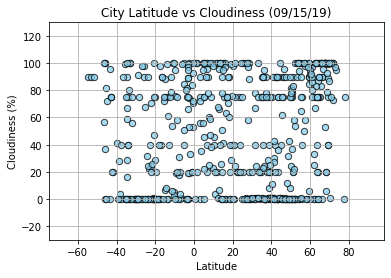

In [16]:
# Build the scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-20), (weather_df["Lat"].max()+20))
plt.ylim((weather_df["Cloudiness"].min()-30), (weather_df["Cloudiness"].max()+30))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/LatvCloudiness.png")

# Show plot
plt.show()

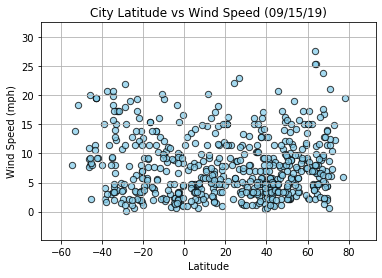

In [17]:
# Build the scatter plot for Latitude vs Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-15), (weather_df["Lat"].max()+15))
plt.ylim((weather_df["Wind Speed"].min()-5), (weather_df["Wind Speed"].max()+5))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("Images/LatvWindSpeed.png")

# Show plot
plt.show()